### Image Classification Model

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\anaconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\ProgramData\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)

2.13.1


In [5]:
import keras
print(keras.__version__)


2.13.1


Dataset of 60,000 28×28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The class labels are:

| Label | Description   |
|-------|---------------|
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |
le boot    |


In [6]:
from keras.datasets import fashion_mnist

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

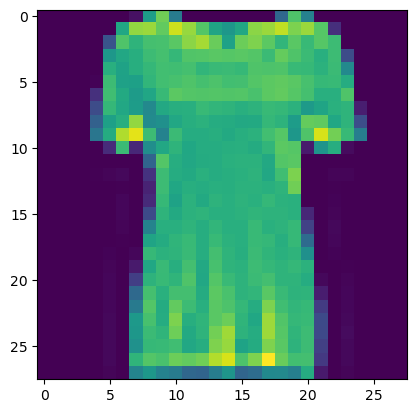

In [9]:
plt.imshow(X_train_full[10])

In [10]:
y_train_full[0]

9

In [11]:
class_names = ["T-shirt/top", "Trouseer", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [12]:
class_names[y_train_full[10]]

'T-shirt/top'

In [13]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

#### Data Normalization

In [14]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

##### Splitting the data into train/validation/test datasets

In [15]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [16]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


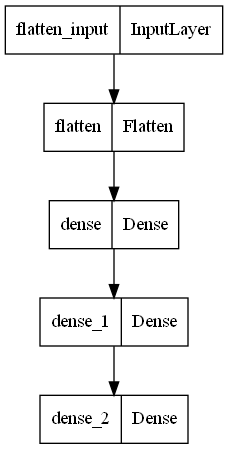

In [21]:
import pydot
keras.utils.plot_model(model)

In [22]:
weights, biases = model.layers[1].get_weights()

In [23]:
weights

array([[-0.02760792,  0.06804466, -0.0132028 , ..., -0.069993  ,
        -0.03227734,  0.03154502],
       [-0.05366387, -0.07097559,  0.06563929, ...,  0.06292155,
        -0.04427072, -0.03052218],
       [ 0.03218044, -0.04237556,  0.05627556, ...,  0.04449435,
        -0.0197944 , -0.00293256],
       ...,
       [-0.0127243 ,  0.02980584,  0.05258596, ..., -0.03015185,
        -0.05769698, -0.07107987],
       [ 0.03582633, -0.03944294, -0.06186564, ..., -0.04117013,
        -0.04571194,  0.02144558],
       [ 0.02526513,  0.00227302,  0.06238277, ..., -0.00291179,
         0.01955639, -0.06776515]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [28]:
model_history = model.fit(X_train, y_train, epochs = 30,
                          validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7037 - accuracy: 0.7661 - val_loss: 0.5140 - val_accuracy: 0.8232
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4835 - accuracy: 0.8289 - val_loss: 0.4322 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4401 - accuracy: 0.8444 - val_loss: 0.5188 - val_accuracy: 0.8070
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4142 - accuracy: 0.8552 - val_loss: 0.3959 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3955 - accuracy: 0.8602 - val_loss: 0.3772 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3772 - accuracy: 0.8664 - val_loss: 0.3702 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3653 - accuracy: 0.8702 - val_loss: 0.3589 - val_accuracy:

In [29]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
model_history.history

{'loss': [0.7037467360496521,
  0.4834655523300171,
  0.44005414843559265,
  0.41424188017845154,
  0.39554548263549805,
  0.3772057294845581,
  0.3653057813644409,
  0.3536674976348877,
  0.3431740403175354,
  0.3337709307670593,
  0.32543429732322693,
  0.3163001835346222,
  0.3094508647918701,
  0.3027936518192291,
  0.29487335681915283,
  0.28994205594062805,
  0.28445297479629517,
  0.2782442271709442,
  0.27318352460861206,
  0.2680451273918152,
  0.262491911649704,
  0.2576221823692322,
  0.25321364402770996,
  0.24880610406398773,
  0.2442145049571991,
  0.24008338153362274,
  0.23615214228630066,
  0.23333364725112915,
  0.22841666638851166,
  0.2248883694410324],
 'accuracy': [0.7661091089248657,
  0.8289454579353333,
  0.8443636298179626,
  0.8551636338233948,
  0.8601818084716797,
  0.866381824016571,
  0.87016361951828,
  0.8743273019790649,
  0.8783454298973083,
  0.8812727332115173,
  0.8839272856712341,
  0.8863454461097717,
  0.8888000249862671,
  0.8910363912582397,
 

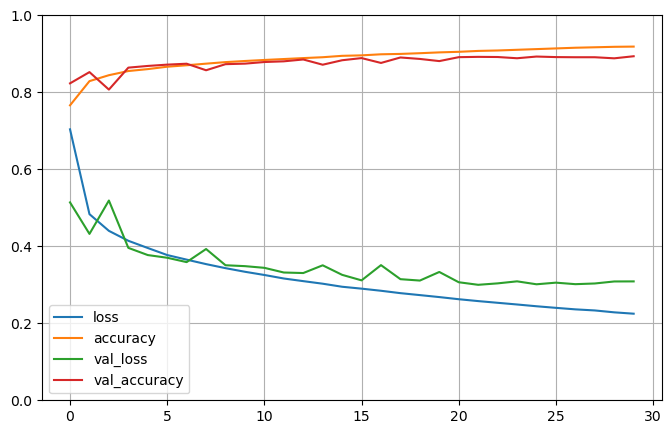

In [31]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8816


[0.3396424949169159, 0.881600022315979]

In [33]:
X_new = X_test[:3]

In [34]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 69ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = model.predict(X_new)                   # probabilities
y_pred_classes = np.argmax(y_pred, axis=1)      # class indices
print(y_pred_classes)                           # just display them

print(np.array(class_names)[y_pred_classes])    # correct label names

1/1 [==============================] - 0s 16ms/step
[9 2 1]
['Ankle Boot' 'Pullover' 'Trouseer']


AxesImage(shape=(28, 28))


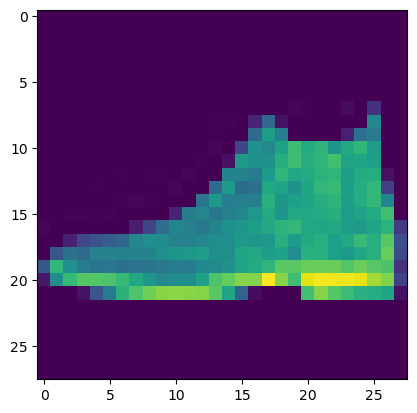

In [36]:
print(plt.imshow(X_test[0]))

AxesImage(shape=(28, 28))


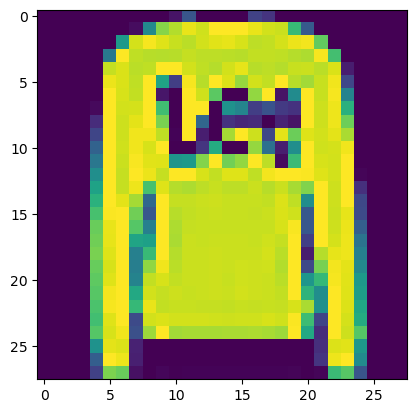

In [37]:
print(plt.imshow(X_test[1]))

AxesImage(shape=(28, 28))


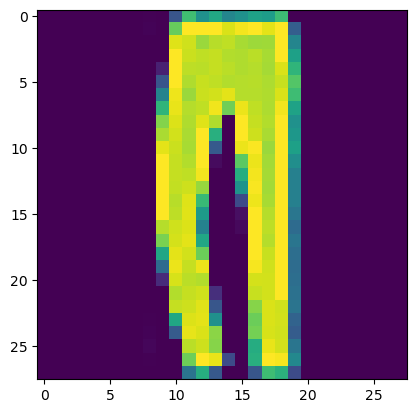

In [42]:
print(plt.imshow(X_test[2]))